# Component 1: Spectrogram

## 1. Tohok Earthquake Location Data
We used here the backend **matplotlib nbagg** instead of **matplotlib inline** because'inline' does not support some interactive functions we need later on. __[(1)](https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python)__ __[(2)](https://matplotlib.org/faq/usage_faq.html)__ 

In [10]:
%matplotlib nbagg

In [11]:
#import the libaries we need to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [12]:
#reads into the location.txt file, provides headers
locations=pd.read_table("data/location.txt",names=["longitude","latitude","default1","default2"],sep="\t")

In [13]:
#look at how the tables look like in the location file
locations

,longitude,latitude,default1,default2
0,-98.683,27.065,1,#
1,-98.102,26.938,1,#
2,-98.068,26.463,1,#
3,-117.110,32.889,1,#
4,-107.790,32.532,1,#
5,-98.916,32.608,1,#
6,-98.079,32.573,1,#
7,-97.410,32.557,1,#
8,-96.530,32.475,1,#
9,-95.756,32.597,1,#


By viewing the tables in the above step, we found out that the two columns 'default1' and 'default2' are irrelevant for our analysis, so we decided to cut them out.

In [14]:
#drop the irrelevant columns default1, defulat 2
locations.drop(["default1","default2"],inplace=True,axis=1)

In [15]:
locations

,longitude,latitude
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
5,-98.916,32.608
6,-98.079,32.573
7,-97.410,32.557
8,-96.530,32.475
9,-95.756,32.597


The number 0 to 437 corresponds to the **station**, so we define it here:

In [16]:
locations["station"]=np.arange(0,438)

In [17]:
#resetting the index to 'station'
locations.set_index("station", inplace=True)

In [18]:
locations

,longitude,latitude
station,,
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
5,-98.916,32.608
6,-98.079,32.573
7,-97.410,32.557
8,-96.530,32.475


In [19]:
#A sanity check to see if our index worked, by locating index number 1
locations.loc[1]

longitude   -98.102
latitude     26.938
Name: 1, dtype: float64

According to NASA's __[Earth Observertory website](https://earthobservatory.nasa.gov/IOTD/view.php?id=49621)__, the Tohoku earthquake struck Japan at "at 38.3 degrees North latitude and 142.4 degrees East longitude". Based on this information, we set the center location of Tohoku accordingly (Longitude, Latitude).

In [20]:
#center point of the tohoku earthquake
tohoku_location=(-142.4,38.3)

In [21]:
locations.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            428, 429, 430, 431, 432, 433, 434, 435, 436, 437],
           dtype='int64', name='station', length=438)

In [22]:
#calculate the distance from tohoku location to each station
from haversine import haversine
locations["distance"]=[haversine(locations.loc[i],tohoku_location) for i in locations.index]

In [23]:
locations

,longitude,latitude,distance
station,,,
0,-98.683,27.065,4882.202882
1,-98.102,26.938,4945.643921
2,-98.068,26.463,4951.013870
3,-117.110,32.889,2836.018544
4,-107.790,32.532,3862.182187
5,-98.916,32.608,4840.802879
6,-98.079,32.573,4933.336172
7,-97.410,32.557,5007.279813
8,-96.530,32.475,5104.639547


In [24]:
#sort the location by the distances from the center point
locations=locations.sort_values("distance")

In [25]:
locations.index

Int64Index([211, 193, 228, 244, 194, 288, 257, 165, 272, 151,
            ...
             63,  50, 121, 359, 375, 242, 286, 269, 304, 287],
           dtype='int64', name='station', length=438)

## 2. Tohoku Earthquake time and magnitude data

In [26]:
#read into the time & magnitude file
array_vals=pd.read_csv("data/data_tohoku_norm_transpose.csv",header=None)

# I understand the logic in this next cell, but don't know how to describe it lol!!

In [27]:
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

### Normalization 

In [28]:
#normalize magnitude in range [0.1] 
min_val=array_vals.min().min()
max_val=array_vals.max().max()
norm_array_vals=(array_vals-min_val)/(max_val-min_val)

In [29]:
#adds in the location data 
norm_array_vals=norm_array_vals[locations.index]

In [30]:
#checking how the tables look like now 
norm_array_vals

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.623412,0.624967,0.624088,0.623702,0.624130,0.623970,0.623856,0.624079,0.623781,0.623555,...,NaN,0.623797,0.623839,0.623919,0.623819,0.624691,0.623909,0.623900,0.623740,0.623914
00:00:01,0.623189,0.625078,0.623944,0.623781,0.624215,0.624050,0.623844,0.623950,0.623769,0.623483,...,NaN,0.623794,0.623857,0.623972,0.624001,0.624460,0.623894,0.623833,0.623947,0.623843
00:00:02,0.622979,0.625176,0.623804,0.623859,0.624296,0.624127,0.623831,0.623824,0.623758,0.623417,...,NaN,0.623792,0.623876,0.624023,0.624178,0.624231,0.623879,0.623769,0.624148,0.623774
00:00:03,0.622786,0.625260,0.623673,0.623933,0.624369,0.624198,0.623820,0.623705,0.623749,0.623359,...,NaN,0.623791,0.623894,0.624069,0.624344,0.624010,0.623865,0.623709,0.624337,0.623710
00:00:04,0.622615,0.625330,0.623554,0.624003,0.624433,0.624261,0.623811,0.623595,0.623741,0.623309,...,NaN,0.623791,0.623910,0.624111,0.624496,0.623803,0.623852,0.623655,0.624509,0.623652
00:00:05,0.622467,0.625384,0.623448,0.624066,0.624488,0.624315,0.623802,0.623495,0.623736,0.623268,...,NaN,0.623792,0.623925,0.624148,0.624631,0.623614,0.623839,0.623606,0.624662,0.623600
00:00:06,0.622345,0.625421,0.623355,0.624122,0.624534,0.624361,0.623795,0.623409,0.623732,0.623237,...,NaN,0.623793,0.623938,0.624180,0.624748,0.623446,0.623828,0.623565,0.624794,0.623555
00:00:07,0.622248,0.625443,0.623276,0.624170,0.624570,0.624397,0.623789,0.623335,0.623730,0.623214,...,NaN,0.623795,0.623949,0.624206,0.624845,0.623301,0.623818,0.623530,0.624904,0.623518
00:00:08,0.622175,0.625450,0.623212,0.624210,0.624597,0.624426,0.623785,0.623276,0.623729,0.623199,...,NaN,0.623797,0.623959,0.624226,0.624923,0.623179,0.623810,0.623503,0.624993,0.623489


### Without normalization

In [31]:
array_vals=array_vals[locations.index]

In [32]:
array_vals.columns=np.arange(0,438)

In [33]:
#station number is in numerical order
array_vals

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,-0.001273,0.002861,0.000524,-0.000501,0.000636,0.000211,-0.000090,0.000501,-0.000291,-0.000892,...,NaN,-0.000249,-0.000137,0.000077,-0.000191,0.002128,0.000049,0.000025,-0.000400,0.000063
00:00:01,-0.001865,0.003157,0.000142,-0.000291,0.000863,0.000425,-0.000125,0.000159,-0.000324,-0.001083,...,NaN,-0.000256,-0.000088,0.000217,0.000294,0.001515,0.000009,-0.000152,0.000151,-0.000126
00:00:02,-0.002425,0.003419,-0.000229,-0.000084,0.001077,0.000629,-0.000157,-0.000176,-0.000352,-0.001258,...,NaN,-0.000261,-0.000039,0.000351,0.000764,0.000905,-0.000029,-0.000323,0.000685,-0.000309
00:00:03,-0.002937,0.003642,-0.000577,0.000114,0.001272,0.000818,-0.000186,-0.000493,-0.000377,-0.001414,...,NaN,-0.000263,0.000008,0.000476,0.001206,0.000318,-0.000067,-0.000482,0.001187,-0.000480
00:00:04,-0.003392,0.003827,-0.000895,0.000298,0.001443,0.000985,-0.000212,-0.000787,-0.000397,-0.001546,...,NaN,-0.000263,0.000052,0.000588,0.001610,-0.000232,-0.000103,-0.000627,0.001645,-0.000635
00:00:05,-0.003784,0.003970,-0.001178,0.000466,0.001589,0.001129,-0.000235,-0.001051,-0.000412,-0.001655,...,NaN,-0.000262,0.000091,0.000686,0.001969,-0.000734,-0.000136,-0.000756,0.002053,-0.000773
00:00:06,-0.004108,0.004070,-0.001424,0.000615,0.001710,0.001250,-0.000254,-0.001281,-0.000422,-0.001739,...,NaN,-0.000259,0.000126,0.000769,0.002279,-0.001180,-0.000166,-0.000866,0.002403,-0.000891
00:00:07,-0.004366,0.004127,-0.001633,0.000743,0.001807,0.001348,-0.000269,-0.001476,-0.000427,-0.001799,...,NaN,-0.000254,0.000156,0.000838,0.002537,-0.001566,-0.000192,-0.000957,0.002695,-0.000990
00:00:08,-0.004560,0.004146,-0.001803,0.000848,0.001880,0.001424,-0.000280,-0.001634,-0.000429,-0.001839,...,NaN,-0.000249,0.000181,0.000891,0.002745,-0.001891,-0.000213,-0.001030,0.002930,-0.001068


# I'm a bit confuse here, are we using the 'normalized array values'? I thought we're using the 'array_vals', then the normalization comes in later in the "vmin=0, vmax=1" part...?

In [34]:
norm_array_vals.fillna(0, inplace=True)

In [35]:
#Station numbers are in order by distance to the center location 
norm_array_vals

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.623412,0.624967,0.624088,0.623702,0.624130,0.623970,0.623856,0.624079,0.623781,0.623555,...,0.0,0.623797,0.623839,0.623919,0.623819,0.624691,0.623909,0.623900,0.623740,0.623914
00:00:01,0.623189,0.625078,0.623944,0.623781,0.624215,0.624050,0.623844,0.623950,0.623769,0.623483,...,0.0,0.623794,0.623857,0.623972,0.624001,0.624460,0.623894,0.623833,0.623947,0.623843
00:00:02,0.622979,0.625176,0.623804,0.623859,0.624296,0.624127,0.623831,0.623824,0.623758,0.623417,...,0.0,0.623792,0.623876,0.624023,0.624178,0.624231,0.623879,0.623769,0.624148,0.623774
00:00:03,0.622786,0.625260,0.623673,0.623933,0.624369,0.624198,0.623820,0.623705,0.623749,0.623359,...,0.0,0.623791,0.623894,0.624069,0.624344,0.624010,0.623865,0.623709,0.624337,0.623710
00:00:04,0.622615,0.625330,0.623554,0.624003,0.624433,0.624261,0.623811,0.623595,0.623741,0.623309,...,0.0,0.623791,0.623910,0.624111,0.624496,0.623803,0.623852,0.623655,0.624509,0.623652
00:00:05,0.622467,0.625384,0.623448,0.624066,0.624488,0.624315,0.623802,0.623495,0.623736,0.623268,...,0.0,0.623792,0.623925,0.624148,0.624631,0.623614,0.623839,0.623606,0.624662,0.623600
00:00:06,0.622345,0.625421,0.623355,0.624122,0.624534,0.624361,0.623795,0.623409,0.623732,0.623237,...,0.0,0.623793,0.623938,0.624180,0.624748,0.623446,0.623828,0.623565,0.624794,0.623555
00:00:07,0.622248,0.625443,0.623276,0.624170,0.624570,0.624397,0.623789,0.623335,0.623730,0.623214,...,0.0,0.623795,0.623949,0.624206,0.624845,0.623301,0.623818,0.623530,0.624904,0.623518
00:00:08,0.622175,0.625450,0.623212,0.624210,0.624597,0.624426,0.623785,0.623276,0.623729,0.623199,...,0.0,0.623797,0.623959,0.624226,0.624923,0.623179,0.623810,0.623503,0.624993,0.623489


In [37]:
#plt.imshow(norm_array_vals.transpose(), aspect = 'auto', cmap = 'jet')

In [48]:
norm_array_vals[:3000].transpose()

time,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,0 days 00:00:06,0 days 00:00:07,0 days 00:00:08,0 days 00:00:09,...,0 days 00:49:50,0 days 00:49:51,0 days 00:49:52,0 days 00:49:53,0 days 00:49:54,0 days 00:49:55,0 days 00:49:56,0 days 00:49:57,0 days 00:49:58,0 days 00:49:59
211,0.623412,0.623189,0.622979,0.622786,0.622615,0.622467,0.622345,0.622248,0.622175,0.622125,...,0.611176,0.611501,0.611474,0.611345,0.611453,0.612159,0.613780,0.616525,0.620449,0.625430
193,0.624967,0.625078,0.625176,0.625260,0.625330,0.625384,0.625421,0.625443,0.625450,0.625445,...,0.631390,0.632957,0.634166,0.634940,0.635253,0.635134,0.634662,0.633962,0.633186,0.632487
228,0.624088,0.623944,0.623804,0.623673,0.623554,0.623448,0.623355,0.623276,0.623212,0.623163,...,0.618324,0.624830,0.631191,0.636842,0.641259,0.644006,0.644783,0.643468,0.640132,0.635038
244,0.623702,0.623781,0.623859,0.623933,0.624003,0.624066,0.624122,0.624170,0.624210,0.624241,...,0.619010,0.617081,0.615642,0.614731,0.614372,0.614586,0.615392,0.616794,0.618775,0.621276
194,0.624130,0.624215,0.624296,0.624369,0.624433,0.624488,0.624534,0.624570,0.624597,0.624616,...,0.618377,0.616942,0.615372,0.613661,0.611871,0.610129,0.608614,0.607530,0.607083,0.607436
288,0.623970,0.624050,0.624127,0.624198,0.624261,0.624315,0.624361,0.624397,0.624426,0.624447,...,0.626221,0.630723,0.634765,0.637946,0.639964,0.640653,0.640000,0.638145,0.635356,0.631990
257,0.623856,0.623844,0.623831,0.623820,0.623811,0.623802,0.623795,0.623789,0.623785,0.623782,...,0.611173,0.611208,0.612212,0.613893,0.615910,0.617910,0.619581,0.620688,0.621101,0.620808
165,0.624079,0.623950,0.623824,0.623705,0.623595,0.623495,0.623409,0.623335,0.623276,0.623229,...,0.632626,0.625553,0.618640,0.612411,0.607300,0.603603,0.601455,0.600822,0.601521,0.603257
272,0.623781,0.623769,0.623758,0.623749,0.623741,0.623736,0.623732,0.623730,0.623729,0.623730,...,0.610656,0.612552,0.614315,0.615830,0.617063,0.618056,0.618910,0.619765,0.620764,0.622029
151,0.623555,0.623483,0.623417,0.623359,0.623309,0.623268,0.623237,0.623214,0.623199,0.623191,...,0.623247,0.616614,0.610331,0.604756,0.600207,0.596944,0.595135,0.594845,0.596021,0.598496


# for the plt.imshow line - do we use array_vals or norm_array_vals? 

<IPython.core.display.Javascript object>


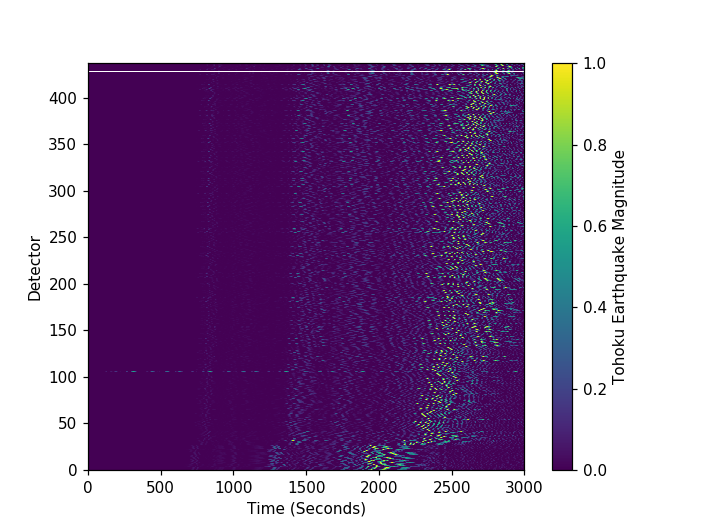

7

In [45]:
fig, ax = plt.subplots()
plt.imshow(array_vals[:3000].transpose(), aspect = 'auto', cmap = 'viridis',vmin=0, vmax=1)
plt.colorbar(label="Tohoku Earthquake Magnitude")
plt.xlabel('Time (Seconds)')
plt.ylabel('Detector')
ax.set_xlim(0,3000)
ax.set_ylim(0,437)
ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
                    bbox=dict(boxstyle="square", fc="w"))
ann.set_visible(False)

def hover(event):
    if event.inaxes == ax:
        if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
            ann.xy=(event.xdata+100,event.ydata)  
        else:
            ann.xy=(event.xdata-5000,event.ydata)
        ann.set_text("detector#=%s\ntime=%s\nmagnitude=%s" %(locations.index.values[int(event.ydata)], str(datetime.timedelta(seconds=int(event.xdata))),array_vals[int(event.ydata)][int(event.xdata)]))   
        ann.set_visible(True)
    else:
        ann.set_visible(False)

fig.canvas.mpl_connect('motion_notify_event', hover)

Reference:
https://stackoverflow.com/questions/47242637/why-doesnt-imshow-show-pixel-values-when-i-hover-over-it
https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python